# K Means Cluster
Name: Sebastian Firsaev 

Student ID: C00263348

Semester: two - 2024

Guide Notebook used: https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb

## Notebook Description
This Jupyter Notebook will explore customer segmentation using the k-Means clustering algorithm. The dataset comprises several features of mall customers, including Customer ID, gender, age, annual income, and spending score. The spending score is a metric assigned to the customer based on defined parameters like customer behavior and purchasing data.

### 1. Business Understanding:
The objective is to segment the mall customers into different groups based on their annual income and spending score to tailor marketing strategies accordingly.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

### 2. Data Understanding:
The dataset includes information such as age, gender, annual income, and spending score of customers visiting a mall.

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
# statistics
print(df.describe())


       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


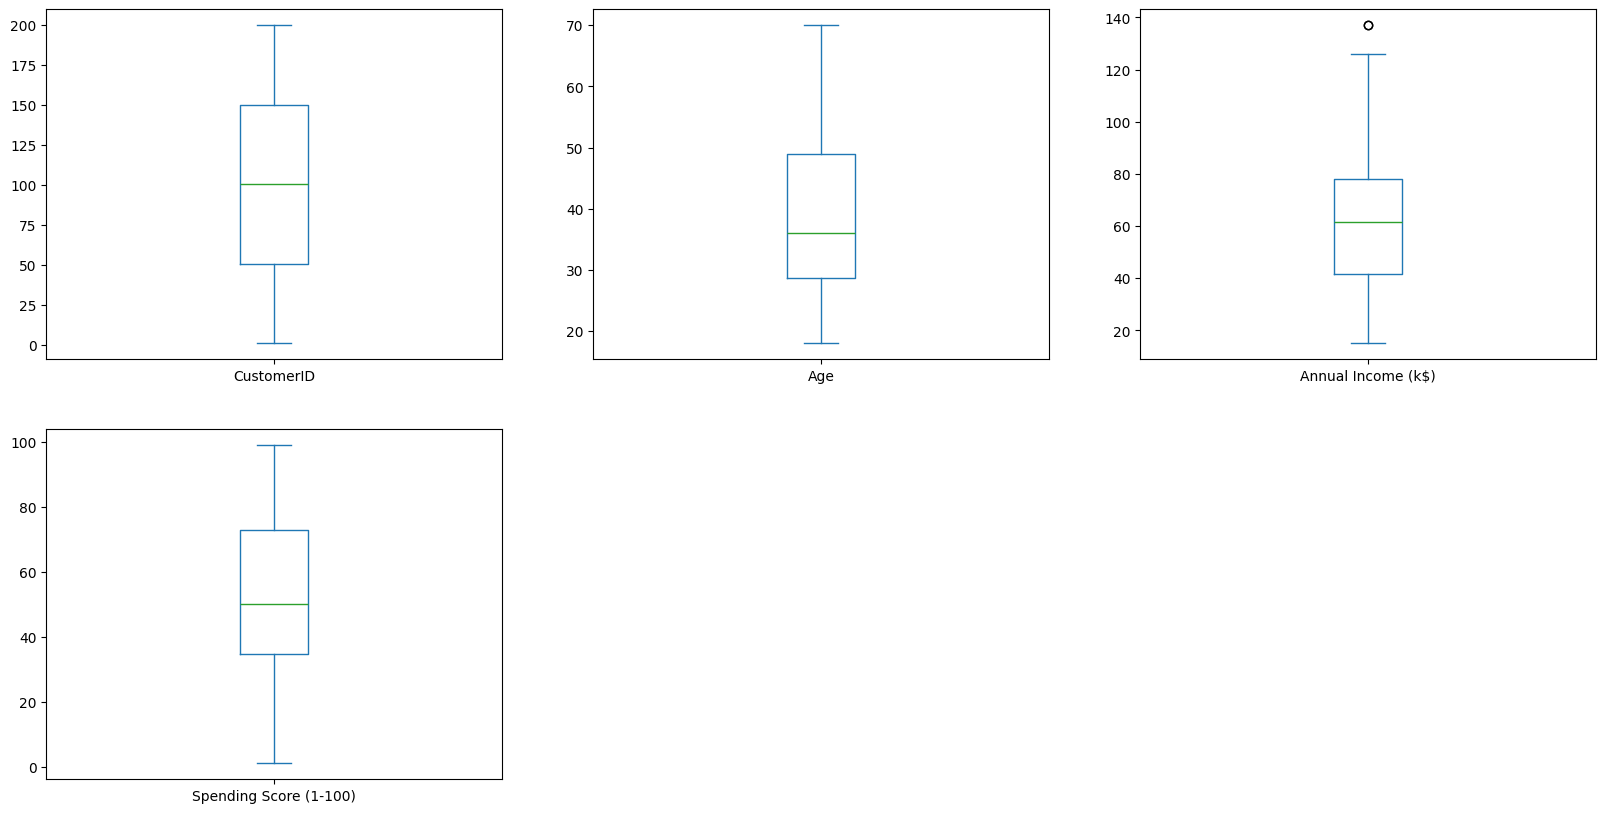

In [5]:

numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
df[numerical_features].plot(kind='box', subplots=True, layout=(2,3), figsize=(20,10))
plt.show()


### 3. Data Preparation

Data preparation steps include checking for missing values and performing feature scaling on 'Annual Income (k$)' and 'Spending Score (1-100)' to standardize the data, making it suitable for clustering.

In [9]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [10]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])

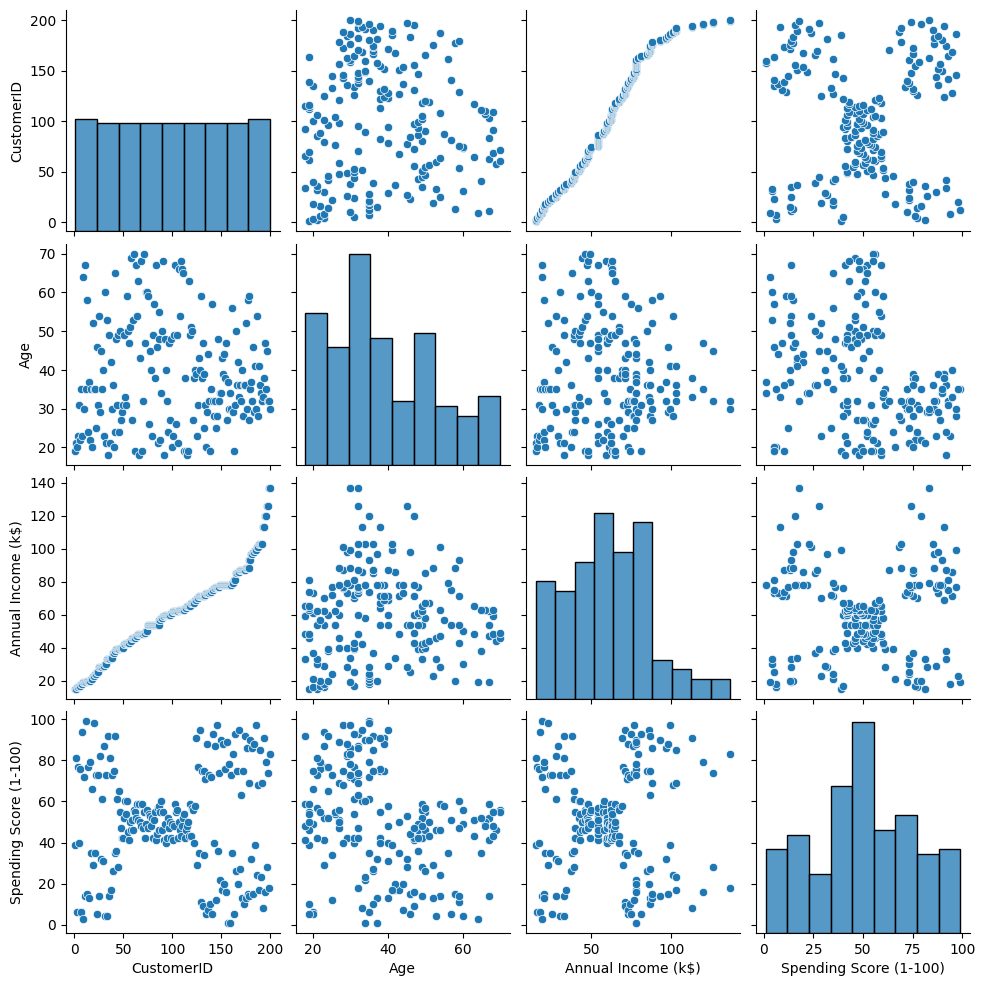

In [11]:
# EDA
sns.pairplot(df)

In [20]:
df = df.drop('CustomerID', axis=1)

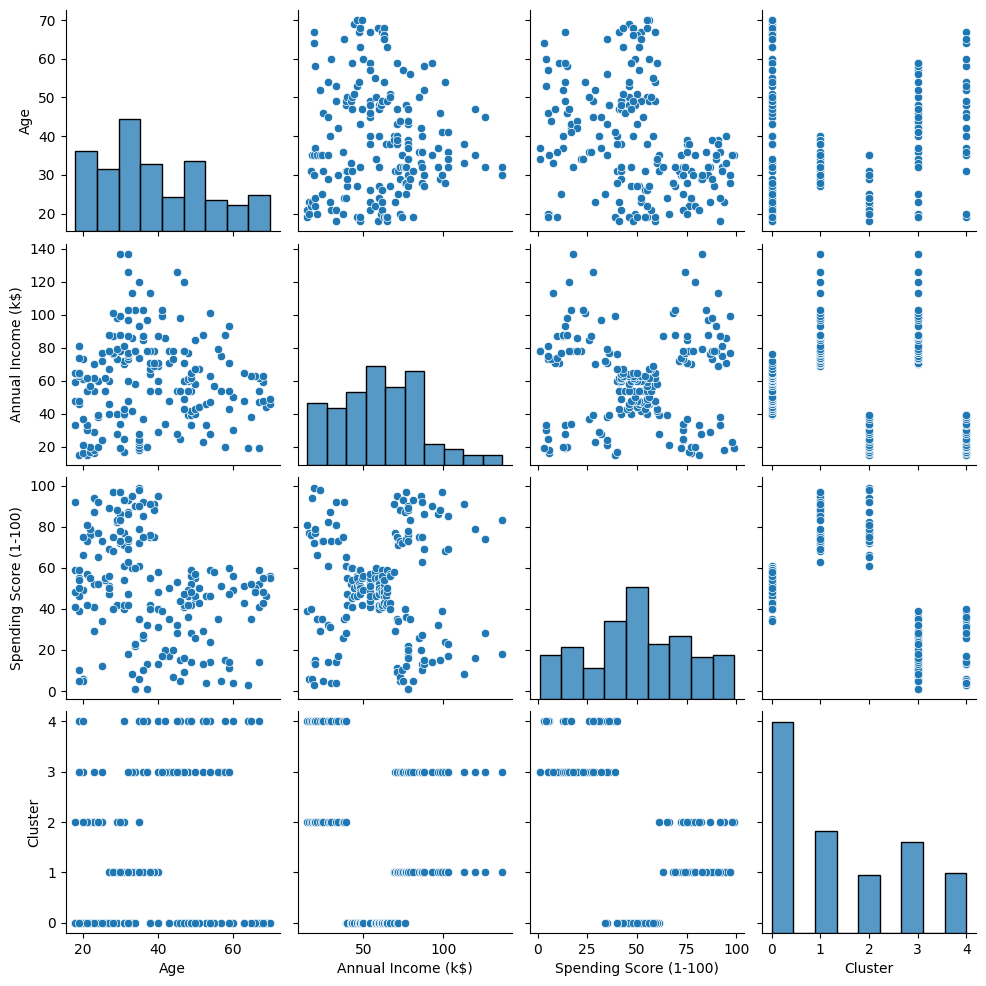

In [21]:
# EDA
sns.pairplot(df)

### 4. Modeling 
The Elbow Method is applied to determine the optimal number of clusters, and then K-Means is executed with this optimal number to segment customers.

In [6]:
# Clustering with k-Means
X = scaled_features
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

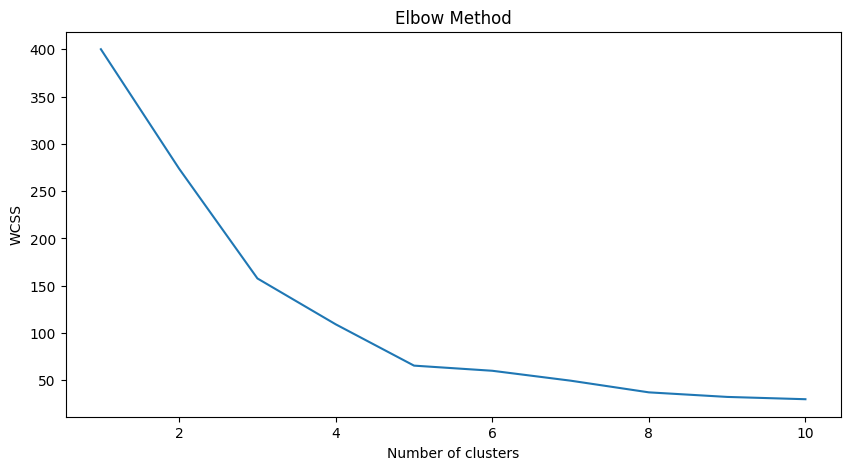

In [22]:
# Plotting the Elbow Method graph
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:

optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)


In [24]:

# Adding cluster labels to the dataframe
df['Cluster'] = y_kmeans

In [25]:
silhouette_avg = silhouette_score(X, y_kmeans)
print(f'Silhouette Score for optimal cluster: {silhouette_avg}')


Silhouette Score for optimal cluster: 0.5546571631111091


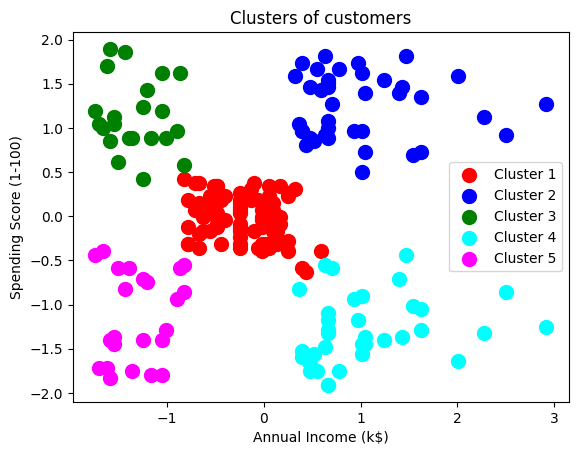

In [26]:
# Visualizing the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

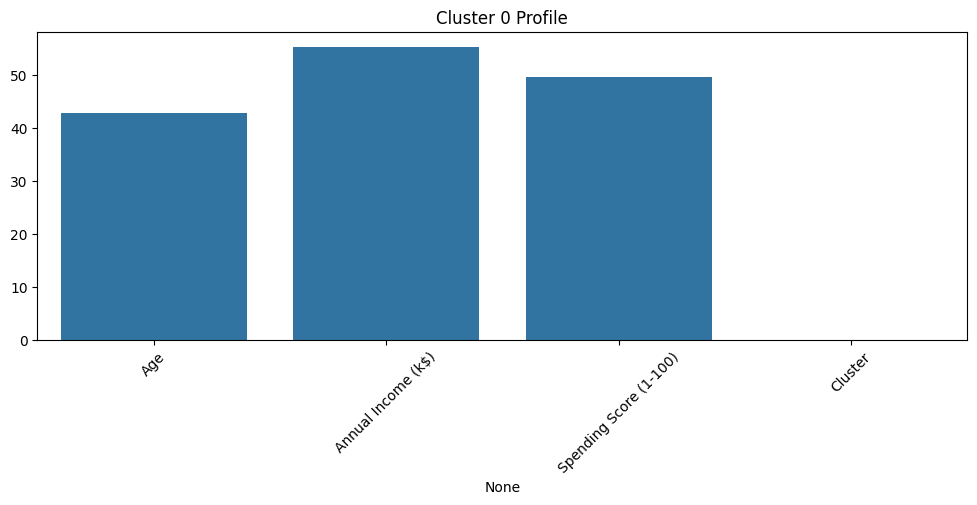

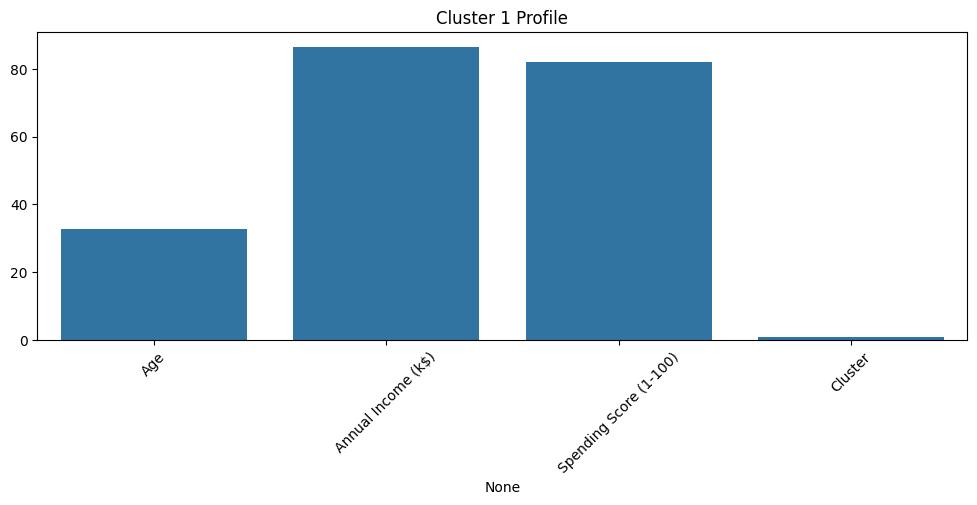

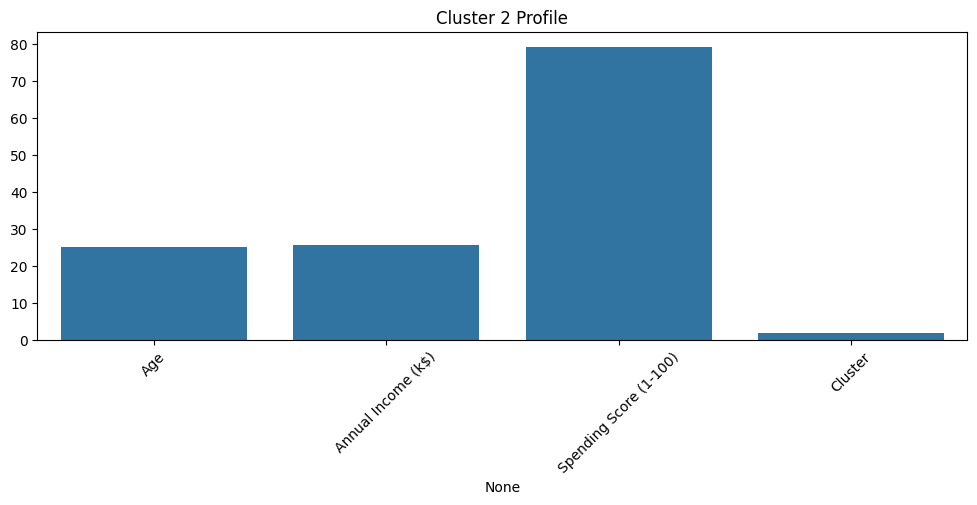

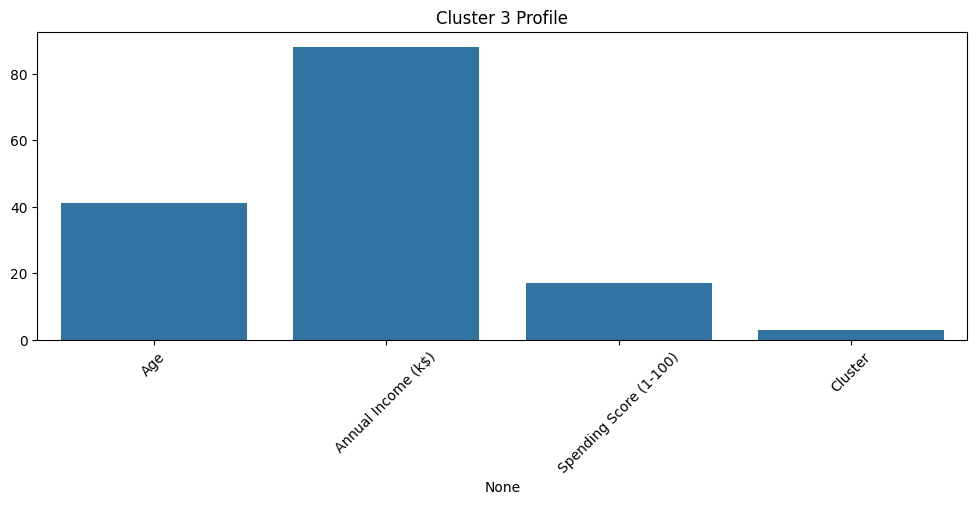

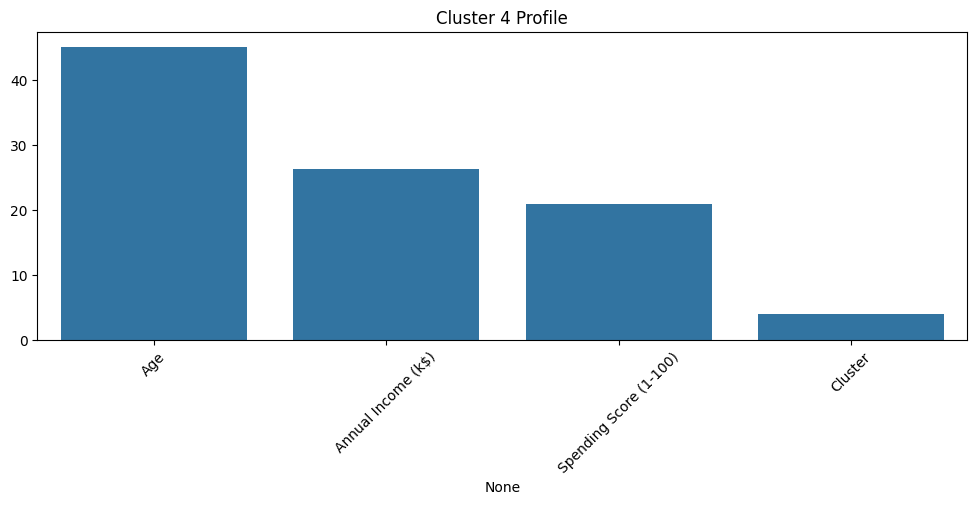

In [27]:
# Advanced EDA with Cluster Insights
for i in range(kmeans.n_clusters):
    cluster_data = df[df['Cluster'] == i]
    numeric_data = cluster_data.select_dtypes(include=[np.number]) 
    means = numeric_data.mean()  
    
    plt.figure(figsize=(12, 4))
    sns.barplot(x=means.index, y=means.values) 
    plt.title(f'Cluster {i} Profile')
    plt.xticks(rotation=45)
    plt.show()



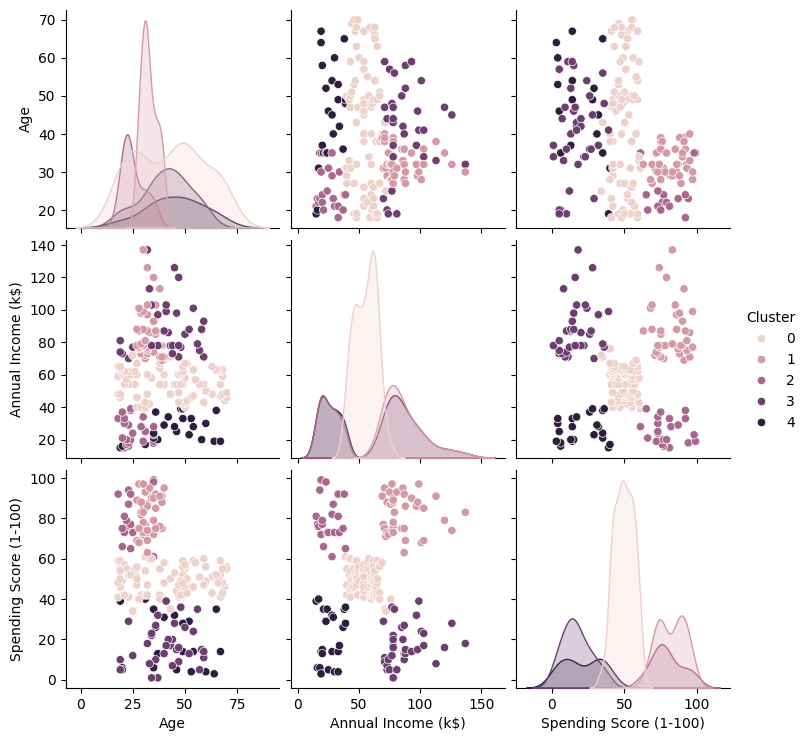

In [28]:
# Pairwise Relationship Visualization
sns.pairplot(df, hue='Cluster')

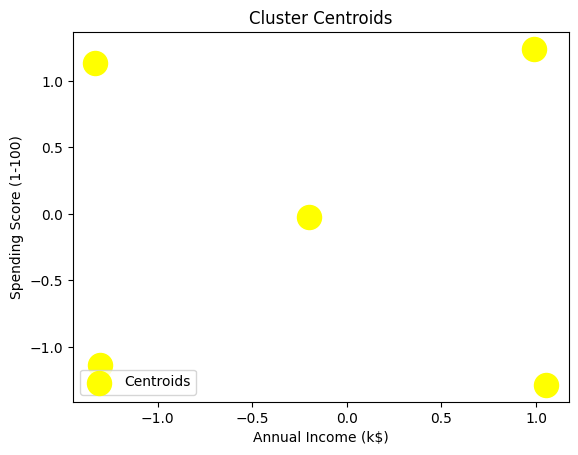

In [29]:
# Cluster Centroid Plot
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Cluster Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

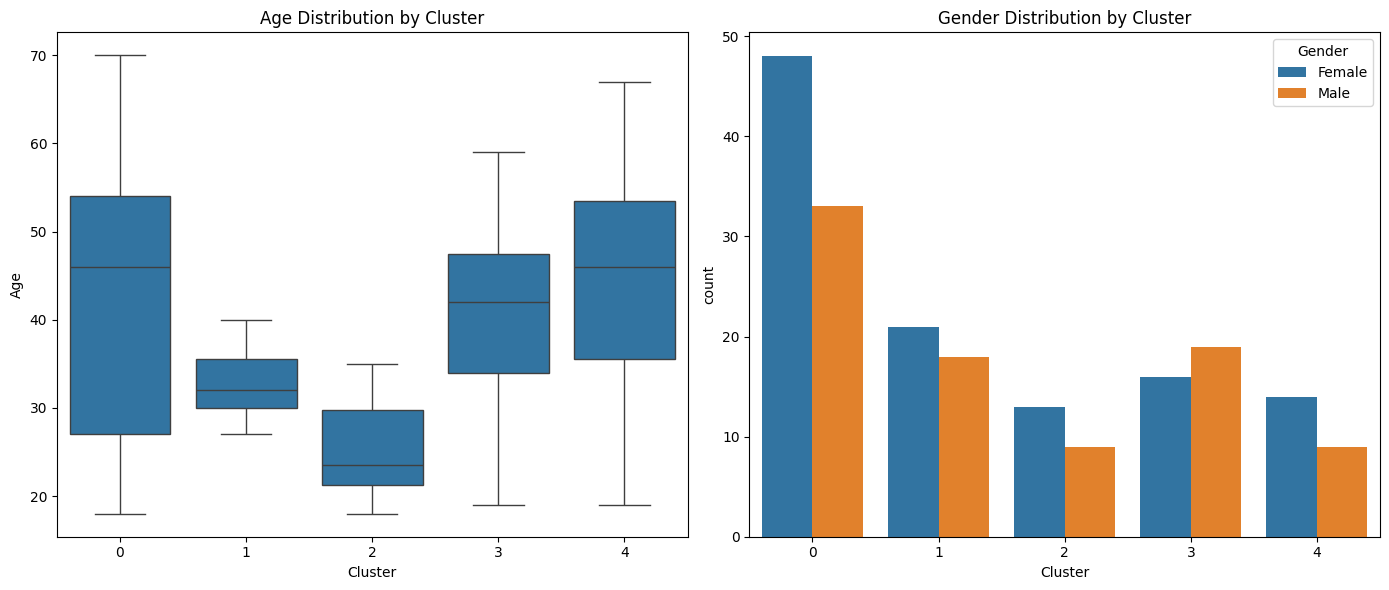

In [30]:
# Demographic Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(x='Cluster', y='Age', data=df, ax=axes[0])
sns.countplot(x='Cluster', hue='Gender', data=df, ax=axes[1])
axes[0].set_title('Age Distribution by Cluster')
axes[1].set_title('Gender Distribution by Cluster')
plt.tight_layout()

These gender distribution insights can be critical for tailoring marketing campaigns. For example, Cluster 0 could be targeted with marketing strategies that appeal more to older women, whereas Clusters 2, 3, and particularly 4 might respond better to campaigns aimed at younger to middle-aged  male demographics.


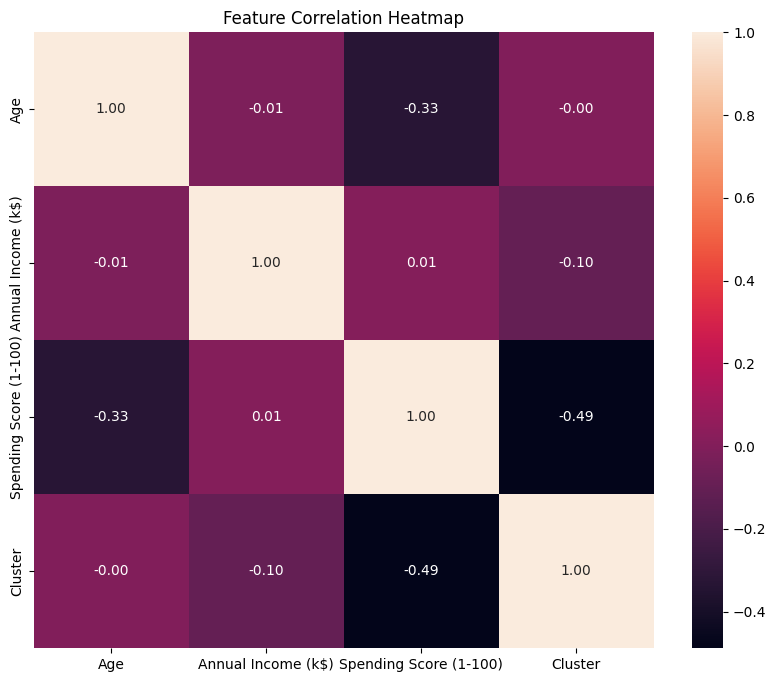

In [31]:
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

### 5. Evaluation
Age has a moderate negative correlation with Spending Score (-0.33), which might indicate that as customers get older, their spending score tends to be lower. This could reflect different spending habits or financial priorities that change with age.
Age does not show a significant correlation with Annual Income (-0.01), suggesting that within this dataset, the age of a customer is not a strong indicator of their income level.

The slight negative correlation between Annual Income and clusters (-0.10) suggests that while income may play a role in how clusters are formed, it's not the sole or most significant factor in determining the customer segments.

The moderate negative correlation between Spending Score and clusters (-0.49) indicates that the spending score is a significant feature in the clustering process. This makes sense because a spending score is likely a key factor in market segmentation; customers with different spending scores may have different needs and behaviors, which is critical information for targeted marketing.
The near-zero correlation between Spending Score and Annual Income (0.01) is interesting, as it suggests that within this dataset, a customer's income level does not necessarily predict their spending habits.

The cluster assignment shows a strong negative correlation with the Spending Score (-0.49), which might suggest that the k-Means algorithm is effectively segmenting the customers based on their spending behavior.
The lack of significant correlation between clusters and Age (-0.00) or Annual Income (-0.10) indicates that these factors may not be as definitive for the segmentation as the Spending Score.

Overall, these results suggest that age and spending score are more indicative of customer segmentation than annual income.